<a href="https://colab.research.google.com/github/marcellels/data_science/blob/master/Trabalho_Final_Eletiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Componentes:**

Marcelle Luiza da Silva - 15200811-6

Rafaela Ribeiro Petró - 

# **h) Obtenção dos Dados e Objetivo do Estudo**

Os dados utilizados nesta análise foram obtidos através do site da [Secretaria da Segurança Pública](https://ssp.rs.gov.br/indicadores-da-violencia-contra-a-mulher) do Rio Grande do Sul.

Sobre os indicadores monitorados e reportados nestes dados, o [Observatório da Violência Contra a Mulher](https://ssp.rs.gov.br/observatorio-da-violencia-contra-a-mulher) pontua:


> Os principais indicadores de âmbito estadual monitorados e divulgados mensalmente dizem respeito ao fenômeno da violência contra as mulheres, tal como definido pela Lei 11.340/06 (Lei Maria da Penha), exercida no âmbito familiar ou de relações íntimas.
São eles: lesão corporal, ameaça e estupro em situação familiar ou íntima. 
Também são monitorados os casos de feminicídio tentados e consumados, definidos a partir da Lei 13.104/15 (Lei do Feminicídio).

Ao longo do estudo, foram utilizados um compilado de informações de ocorrências de violência contra a mulher que aconteceram entre os anos de 2012 a 2019, mês a mês, com o oobjetivo de realizadar uma avaliação do **cenário da violência contra a mulher no estado do Rio Grande do Sul**.

#**a) Ler arquivo de dados**

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importar arquivos

# violência contra a mulher no RS entre 2012 e 2019
df0 = pd.read_csv("https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Viol%C3%AAncia%20Contra%20a%20Mulher%20(RS)/Dados_Violencia_Contra_Mulher_RS_2012_2019.csv", delimiter=";")
df0.data = pd.to_datetime(df0.data, format="%m-%Y")


#**b) Apresentar dados da estrutura**

In [4]:
# identificar número de variáveis e entradas
print("Variáveis:\t", df0.shape[1])
print("Entradas:\t", df0.shape[0])

Variáveis:	 6
Entradas:	 96


In [5]:
# verificar os tipos de variáveis
df0.dtypes

data                   datetime64[ns]
ameaca                          int64
lesao                           int64
estupro                         int64
feminicidio                     int64
feminicidio_tentado           float64
dtype: object

In [6]:
# passar a data para o index
df = df0.copy()
df.index = df['data']
del df['data']

Agora temos apenas 5 variáveis.

In [7]:
# determinar % de valores ausentes por coluna
(df.isnull().sum() / df.shape[0])*100

ameaca                  0.0
lesao                   0.0
estupro                 0.0
feminicidio             0.0
feminicidio_tentado    12.5
dtype: float64

In [10]:
# descartar dados ausentes
df.dropna(inplace=True)
df.shape


(84, 5)

In [11]:
# mostrar as 5 primeiras entradas do dataset
df.head()

,ameaca,lesao,estupro,feminicidio,feminicidio_tentado
data,,,,,
2013-01-01,4537,2674,153,7,26.0
2013-02-01,3853,2425,129,12,21.0
2013-03-01,3845,2298,104,8,19.0
2013-04-01,3683,2071,105,9,19.0
2013-05-01,3237,1970,116,10,13.0


# **c) Totalizar dados**

In [16]:
# incluir coluna total com o somatório das ocorrências
df['total_ocorrencias'] = (df['ameaca'] + df['lesao'] + df['estupro'] + df['feminicidio'] + df['feminicidio_tentado'])

In [17]:
# agrupar dados por ano somando as ocorrencias por tipo
df_agrupar = df.groupby(df.index.year).sum()

In [20]:
# verificar o número de entradas
df_agrupar.shape[0]

7

Temos 7 anos relacionados no dataset

In [21]:
# mostrar todas as entradas
df_agrupar.head(7)

,ameaca,lesao,estupro,feminicidio,feminicidio_tentado,total_ocorrencias
data,,,,,,
2013,43879,26137,1448,92,229.0,71785.0
2014,44771,25542,1407,75,286.0,72081.0
2015,42841,24533,1472,99,311.0,69256.0
2016,39606,22667,1574,96,263.0,64206.0
2017,37946,22960,1661,83,322.0,62972.0
2018,37623,21815,1712,116,355.0,61621.0
2019,37381,20989,1714,97,359.0,60540.0


In [25]:
# calcular o número total de ocorrências para os 7 anos e média
total = df_agrupar.total_ocorrencias.sum()
media = df_agrupar.total_ocorrencias.mean()

print('Número total de ocorrências entre 2013 e 2014:', int(total))
print('Número médio de ocorrências entre 2013 e 2014:', int(media))

Número total de ocorrências entre 2013 e 2014: 462461
Número médio de ocorrências entre 2013 e 2014: 66065


In [31]:
# mostrar o número máximo e médio de feminicídios diários
print('Número máximo de feminicídios diários:', df.feminicidio.max())
print('Número médio de feminicídios diários: {:.2f}'.format(df.feminicidio.mean()))

Número máximo de feminicídios diários: 16
Número médio de feminicídios diários: 7.83


#**d) Filtrar dados**

In [38]:
# datas em que o número de feminicídio foi superior à média
df_filtrar = df.loc[df['feminicidio'] >= df.feminicidio.mean()]
print(df_filtrar.feminicidio)

data
2013-02-01    12
2013-03-01     8
2013-04-01     9
2013-05-01    10
2013-06-01     9
2013-09-01     8
2013-12-01     9
2014-02-01     9
2014-03-01    11
2014-04-01     8
2014-11-01     9
2014-12-01     8
2015-02-01    13
2015-04-01     9
2015-05-01     8
2015-08-01    12
2015-09-01     9
2015-10-01    11
2015-12-01     8
2016-01-01    10
2016-02-01    13
2016-03-01     8
2016-04-01    11
2016-08-01    10
2016-09-01    10
2016-12-01     9
2017-01-01     9
2017-02-01     8
2017-06-01     9
2017-08-01     8
2017-09-01    14
2018-03-01     8
2018-04-01    11
2018-05-01    10
2018-06-01    16
2018-07-01     8
2018-08-01    10
2018-09-01    12
2018-11-01     8
2018-12-01    16
2019-03-01    11
2019-05-01    11
2019-06-01     9
2019-07-01    14
2019-08-01     8
2019-10-01     9
2019-11-01    11
Name: feminicidio, dtype: int64


In [48]:
# número de feminicídios superior à média agrupado por ano
df_filtrar.index.year.value_counts().sort_values()

2017    5
2014    5
2019    7
2016    7
2015    7
2013    7
2018    9
Name: data, dtype: int64

#**e) Representação visual**

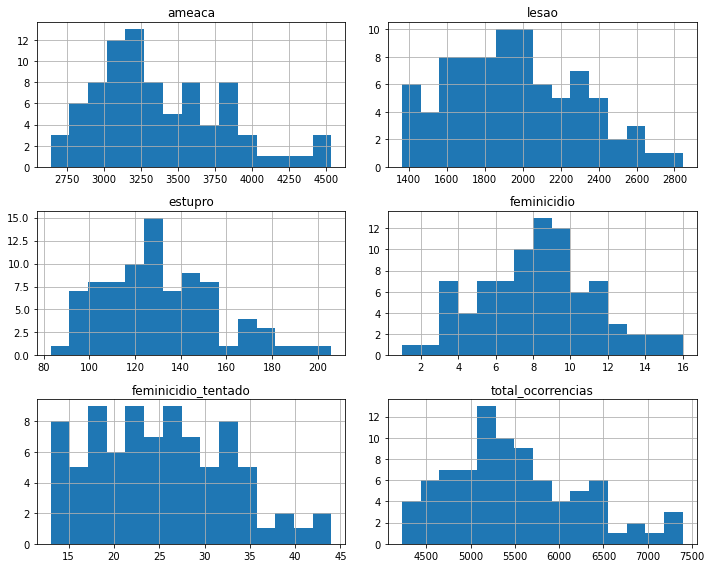

In [53]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(10,8))
plt.tight_layout();

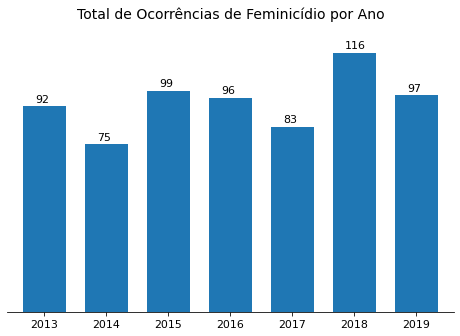

In [70]:
# plotar o gráfico da variável feminicidio
plt.figure(figsize=(8,5))

ax = (df_agrupar.feminicidio.plot(kind='bar', rot=0, width=0.7))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+2))

ax.grid(False)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Total de Ocorrências de Feminicídio por Ano\n')
plt.xlabel('')

plt.savefig('ocorrencias_ano_fem.png')
plt.show()